In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data1 = pd.read_csv('/content/train_data part-a.txt', sep='\t')

data1.head()

,ID,Target,Tweet,Stance
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",AGAINST
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,FAVOR
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,AGAINST
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,AGAINST
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,NONE


In [ ]:
data1.shape

(100, 4)

In [ ]:
import pandas as pd

data2 = pd.read_csv('/content/train_data part-b.txt', sep=None, engine='python', encoding='latin-1')

data2.head()

,ID,Target,Tweet,Stance
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST
4,105,Atheism,And stay in your houses and do not display you...,AGAINST


In [ ]:
data2.shape

(2814, 4)

In [ ]:
data=pd.concat([data1,data2],axis=0)

In [ ]:
data.head()

,ID,Target,Tweet,Stance
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",AGAINST
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,FAVOR
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,AGAINST
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,AGAINST
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,NONE


In [ ]:
data.sample(40)

,ID,Target,Tweet,Stance
1700,1801,Hillary Clinton,"So @ClintonFdn, I believe Andrew Fastow beat y...",AGAINST
1663,1764,Hillary Clinton,"@tjhansen @owillis serious, if trump runs you'...",NONE
2545,2646,Legalization of Abortion,It's great that same-sex marriage has been mad...,AGAINST
1541,1642,Feminist Movement,Don't you just love how feminists are more foc...,AGAINST
803,904,Climate Change is a Real Concern,[Man] cannot change the climate of any country...,AGAINST
812,913,Climate Change is a Real Concern,#Transpregnancy #transgender is a major reason...,NONE
1365,1466,Feminist Movement,"Women are shamed if they don't want children, ...",FAVOR
2055,2156,Hillary Clinton,of lear jets and fax machines...LOL @HillaryCl...,AGAINST
1910,2011,Hillary Clinton,@nytimes this will cost them the 2016 election...,NONE
1923,2024,Hillary Clinton,I got it! I got it! A Hillary accomplishment...,AGAINST


In [ ]:
print("Shape of the DataFrame:", data.shape)

Shape of the DataFrame: (2914, 4)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 0 to 2813
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2914 non-null   int64 
 1   Target  2914 non-null   object
 2   Tweet   2914 non-null   object
 3   Stance  2914 non-null   object
dtypes: int64(1), object(3)
memory usage: 113.8+ KB


In [ ]:
print("The null values in the dataframe:")
print(data.isnull().sum())

The null values in the dataframe:
ID        0
Target    0
Tweet     0
Stance    0
dtype: int64


In [ ]:
data.duplicated().sum()
print("\nNumber of duplicates:",data.duplicated().sum())


Number of duplicates: 0


In [ ]:
data['Target'].value_counts()

,count
Target,
Hillary Clinton,689
Feminist Movement,664
Legalization of Abortion,653
Atheism,513
Climate Change is a Real Concern,395


In [ ]:
data['Stance'].value_counts()

,count
Stance,
AGAINST,1395
NONE,766
FAVOR,753


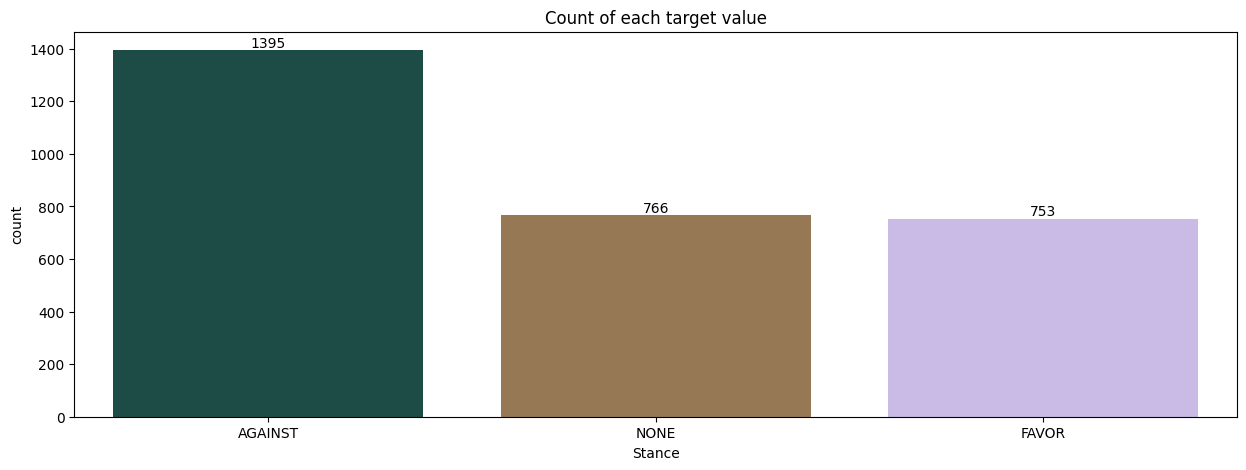

In [ ]:
target_counts = data['Stance'].value_counts().reset_index()

plt.figure(figsize=(15, 5))
ax = sns.barplot(data=target_counts, x='Stance', y='count', palette='cubehelix')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Count of each target value")
plt.show()

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()

def preprocess_text(Tweet):
    text = Tweet
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    cleaned_text = ' '.join(lemmatized_tokens)

    return tokens, lemmatized_tokens, cleaned_text

data[['tokenized_tweet', 'lemmatized_tweet', 'cleaned_tweet']] = data['Tweet'].apply(lambda x: pd.Series(preprocess_text(x)))

data[['Tweet', 'tokenized_tweet', 'lemmatized_tweet', 'cleaned_tweet']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Tweet,tokenized_tweet,lemmatized_tweet,cleaned_tweet
0,"@tedcruz And, #HandOverTheServer she wiped cle...","[and, she, wiped, clean, k, deleted, emails, e...","[and, she, wiped, clean, k, deleted, email, ex...",and she wiped clean k deleted email explains d...
1,Hillary is our best choice if we truly want to...,"[hillary, is, our, best, choice, if, we, truly...","[hillary, is, our, best, choice, if, we, truly...",hillary is our best choice if we truly want to...
2,@TheView I think our country is ready for a fe...,"[i, think, our, country, is, ready, for, a, fe...","[i, think, our, country, is, ready, for, a, fe...",i think our country is ready for a female pres...
3,I just gave an unhealthy amount of my hard-ear...,"[i, just, gave, an, unhealthy, amount, of, my,...","[i, just, gave, an, unhealthy, amount, of, my,...",i just gave an unhealthy amount of my hardearn...
4,@PortiaABoulger Thank you for adding me to you...,"[thank, you, for, adding, me, to, your, list]","[thank, you, for, adding, me, to, your, list]",thank you for adding me to your list


In [ ]:
from IPython.display import display

display(data[['Tweet', 'cleaned_tweet']].sample(10))

,Tweet,cleaned_tweet
1146,"Time to go hashtag crazy, then... #Folklore #U...",time to go hashtag crazy then
70,"@latikia @seangillies Yeah, right? Lol wink wi...",yeah right lol wink wink nudge nudge the great...
372,Happiness is the pursuit of life and liberty. ...,happiness is the pursuit of life and liberty
788,"Clean technology, this is your moment #innovat...",clean technology this is your moment
1006,@MrMikeCalta Proud to say I don't listen to f...,proud to say i dont listen to fat crossed eyed mj
48,I'm on the edge of my seat to start volunteeri...,im on the edge of my seat to start volunteerin...
1365,"Women are shamed if they don't want children, ...",woman are shamed if they dont want child but t...
1643,Ding Dong ____ _____ __ ____ #SemST,ding dong
561,"@SenWhitehouse "" Dr. David Legates of the Univ...",dr david legate of the university of delaware ...
2434,"Jesus loves the children of the world, the bor...",jesus love the child of the world the born and...


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data['text_no_stopwords'] = data['cleaned_tweet'].apply(remove_stopwords)

display(data[['cleaned_tweet', 'text_no_stopwords']].sample(10))

,cleaned_tweet,text_no_stopwords
1476,all the people who support abortion to bad the...,people support abortion bad parent didnt pract...
1683,in case of emergency push this button to scrub...,case emergency push button scrub server
929,did you know gender stereotype a we know then ...,know gender stereotype know developed beginnin...
344,bible expo here at truthcastercom please come ...,bible expo truthcastercom please come thanks
453,rt faith activates god fear activates the enem...,rt faith activates god fear activates enemy jo...
474,may your heart be firmly fixed trusting the lo...,may heart firmly fixed trusting lord shall fal...
2298,because it not your baby body or decision nor ...,baby body decision doe effect life way none bu...
1306,if feminist were honest i know men dont have t...,feminist honest know men dont right kind thought
492,religion are proud when there isnt evidence fo...,religion proud isnt evidence one madeup story
2650,so when tell you mlk wa theyre lying their gul...,tell mlk wa theyre lying gullible follower r l...


In [ ]:
from IPython.display import display
display(data[['Tweet', 'cleaned_tweet', 'text_no_stopwords']].sample(10))

,Tweet,cleaned_tweet,text_no_stopwords
1496,"IF FEMINISTS WERE HONEST ""Be careful, if you ...",if feminist were honest be careful if you use ...,feminist honest careful use logic conversation...
2155,@Ered604 welcome 2 Twitter~PROUD to be #UNITEB...,welcome twitterproud to be,welcome twitterproud
934,When is it ok for a married 49-year-old CEO to...,when is it ok for a married yearold ceo to use...,ok married yearold ceo use power influence sha...
101,god of the gaps is not evidence #next #SemST,god of the gap is not evidence,god gap evidence
1620,Marriage equality a constitutional right! Woot...,marriage equality a constitutional right woot,marriage equality constitutional right woot
2605,We should not deny the basic human right to li...,we should not deny the basic human right to li...,deny basic human right life unborn baby
2401,@EmilyBeaulieu1 maybe that's what he wants #SemST,maybe thats what he want,maybe thats want
54,"1/5""And the heaven We created with might, and ...",and the heaven we created with might and indee...,heaven created might indeed expander quran
2146,@foxnewspolitics NOT EVEN A LITTLE BIT!!! #Nob...,not even a little bit,even little bit
1572,RT @GunnJessica: Because I want young American...,rt because i want young american woman to be a...,rt want young american woman able proud st wom...


[('woman', 225), ('dont', 173), ('right', 168), ('u', 161), ('people', 157), ('feminist', 154), ('god', 151), ('hillary', 136), ('want', 132), ('like', 132)]


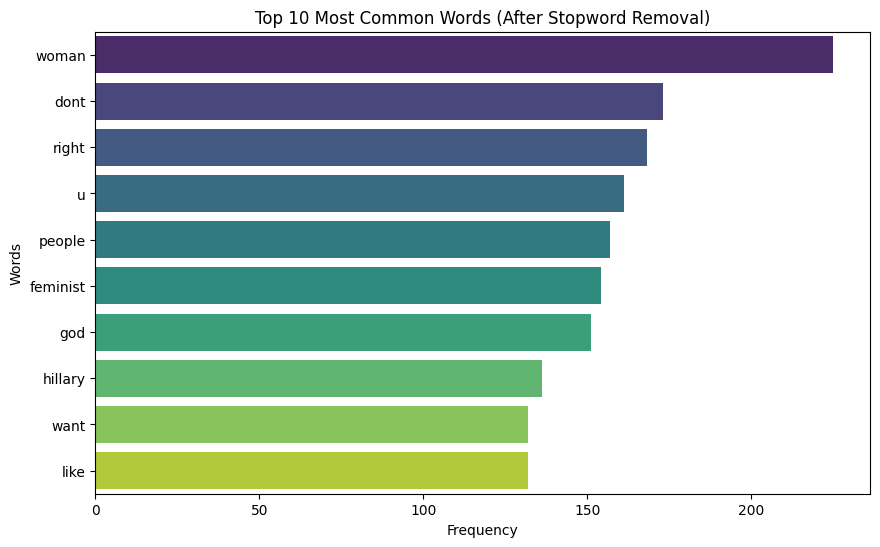

In [ ]:
from collections import Counter

all_text = ' '.join(data['text_no_stopwords'])

word_freq = Counter(all_text.split())

print(word_freq.most_common(10))

common_words = word_freq.most_common(10)

words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Common Words (After Stopword Removal)")
plt.show()

In [ ]:
from nltk.util import ngrams

custom_stopwords = {"rt", "amp", "im", "u", "ur", "thats", "dont", "cant", "ive", "wanna", "gonna"}
stop_words.update(custom_stopwords)

def generate_ngrams(text, n):
    tokens = [word for word in nltk.word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]
    return [' '.join(grams) for grams in ngrams(tokens, n)]

tweets = data['cleaned_tweet'].dropna().tolist()

all_unigrams, all_bigrams, all_trigrams = [], [], []

for tweet in tweets:
    if isinstance(tweet, str):
        all_unigrams.extend(generate_ngrams(tweet, 1))
        all_bigrams.extend(generate_ngrams(tweet, 2))
        all_trigrams.extend(generate_ngrams(tweet, 3))

unigram_freq = Counter(all_unigrams)
bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

def display_top_ngrams(ngram_freq, ngram_type):
    print(f"\nTop 10 {ngram_type}:")
    for ngram, freq in ngram_freq.most_common(10):
        print(f"{ngram}: {freq}")

display_top_ngrams(unigram_freq, 'Unigrams')
display_top_ngrams(bigram_freq, 'Bigrams')
display_top_ngrams(trigram_freq, 'Trigrams')



Top 10 Unigrams:
woman: 225
right: 168
people: 157
feminist: 154
god: 151
hillary: 136
want: 132
like: 132
life: 122
get: 120

Top 10 Bigrams:
climate change: 28
hillary clinton: 25
gon na: 18
human right: 14
know whats: 14
equal right: 14
even manage: 14
manage want: 14
womens right: 13
whats best: 13

Top 10 Trigrams:
even manage want: 14
know whats best: 12
holy mary mother: 5
mary mother god: 5
mother god pray: 5
god pray sinner: 5
pray sinner hour: 5
sinner hour death: 5
hour death amen: 5
innovation development make: 4


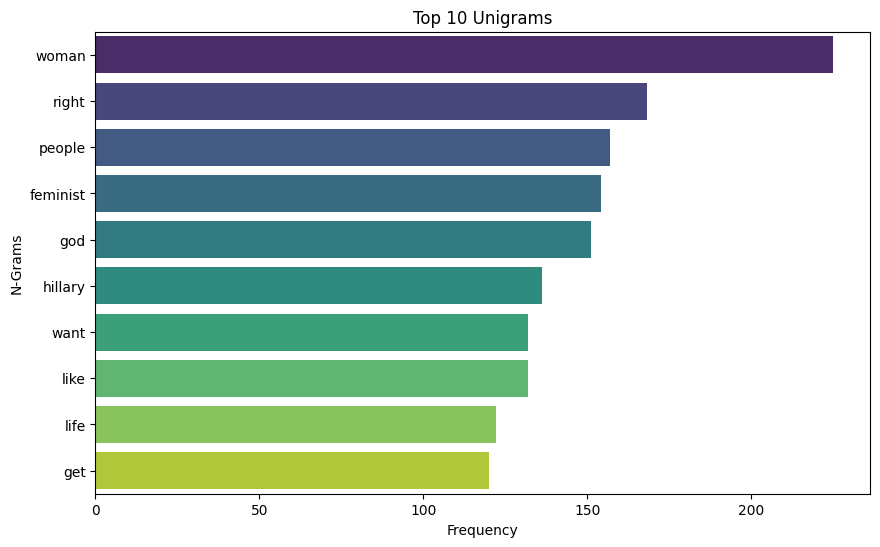

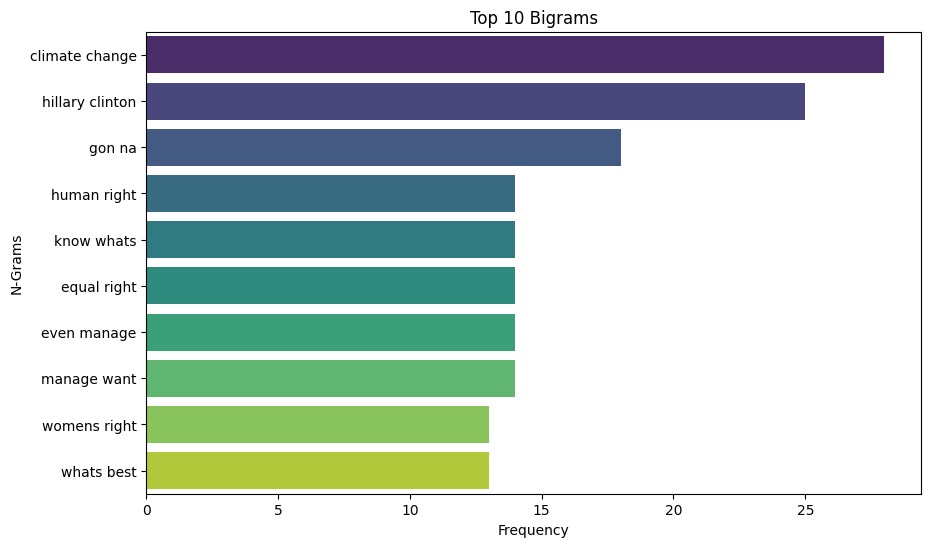

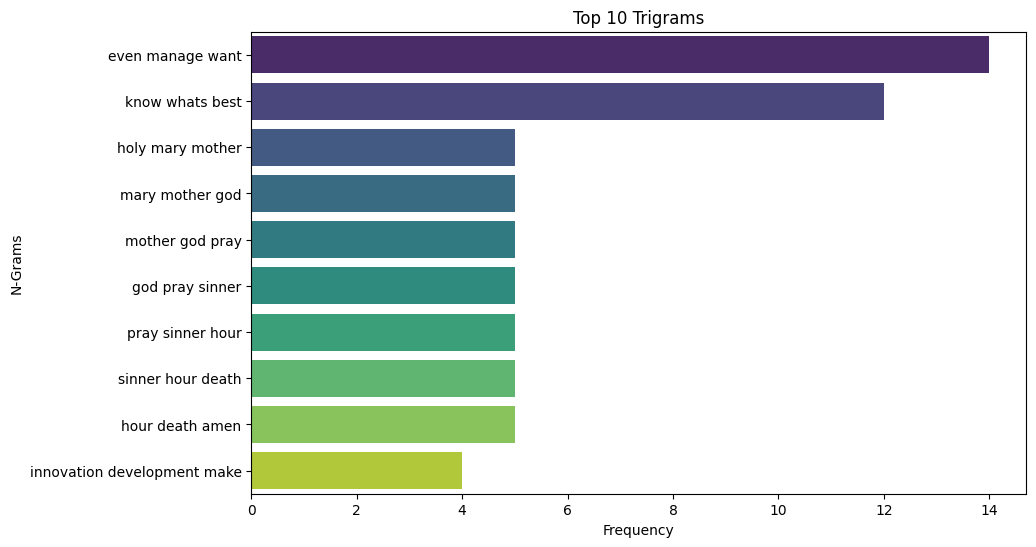

In [ ]:
def plot_top_ngrams(ngram_freq, title):
    top_ngrams = ngram_freq.most_common(10)
    if not top_ngrams:
        print(f"No {title} found!")
        return

    ngrams, counts = zip(*top_ngrams)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(ngrams), palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-Grams")
    plt.show()

plot_top_ngrams(unigram_freq, 'Top 10 Unigrams')
plot_top_ngrams(bigram_freq, 'Top 10 Bigrams')
plot_top_ngrams(trigram_freq, 'Top 10 Trigrams')


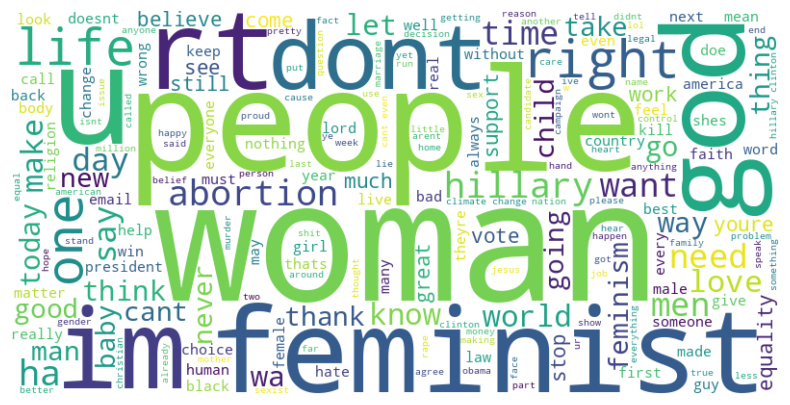

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

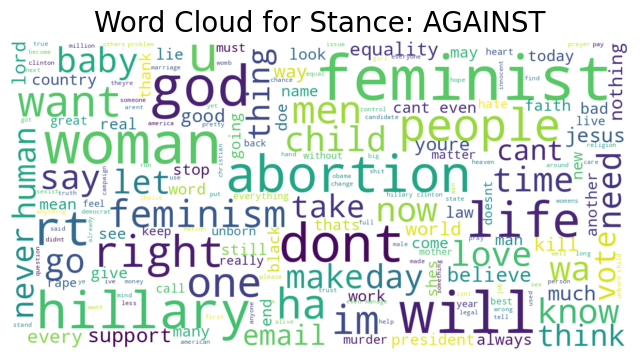

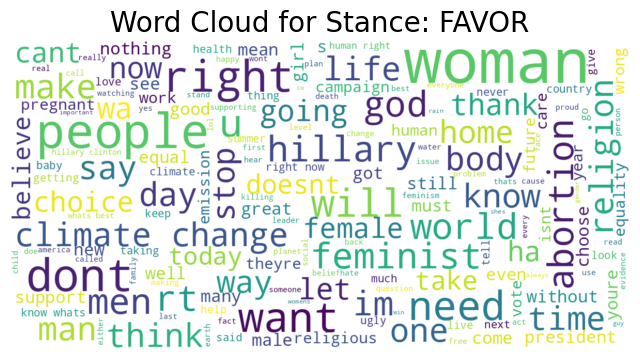

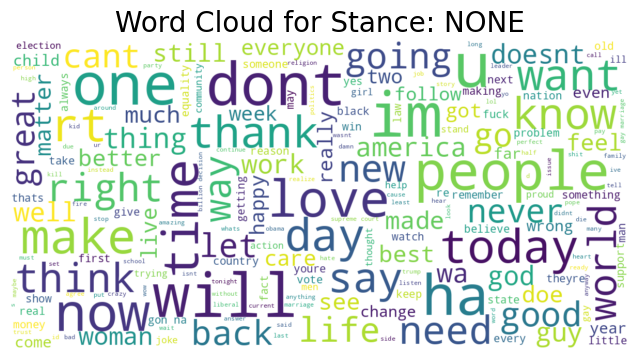

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_word_cloud(text, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

unique_stances = data['Stance'].unique()

for stance in unique_stances:
    subset = data[data['Stance'] == stance]
    text = ' '.join(subset['cleaned_tweet'])
    plot_word_cloud(text, f'Word Cloud for Stance: {stance}')


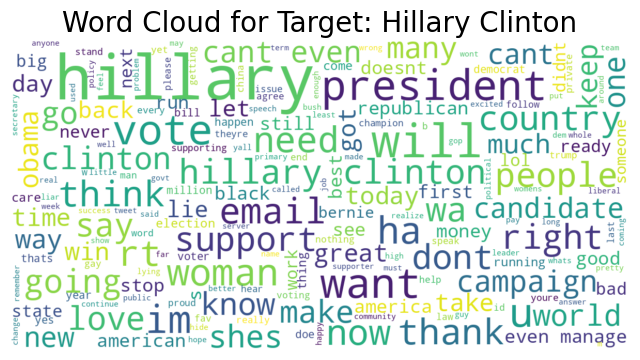

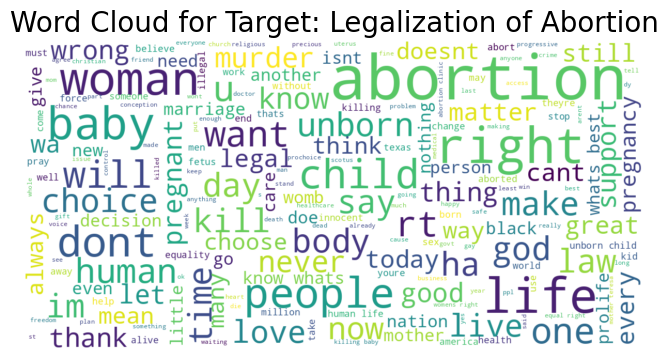

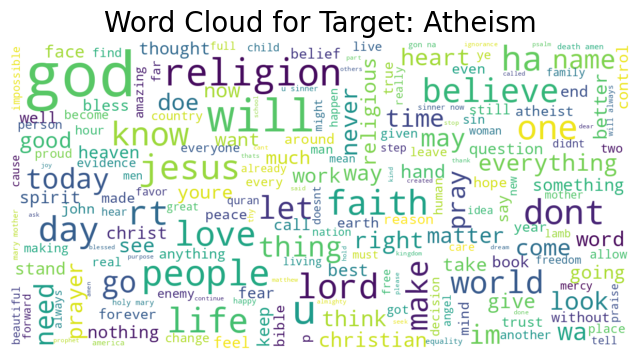

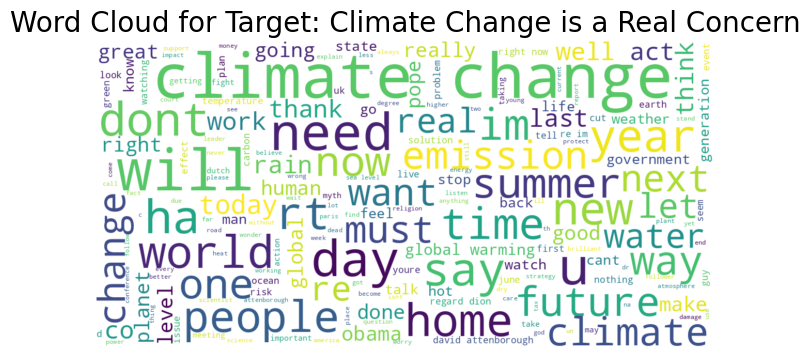

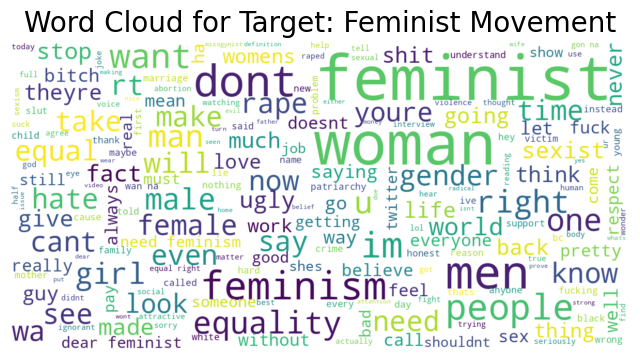

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_word_cloud(text, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=42
    ).generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

unique_targets = data['Target'].unique()

for target in unique_targets:
    subset = data[data['Target'] == target]
    text = ' '.join(subset['cleaned_tweet'])
    plot_word_cloud(text, f'Word Cloud for Target: {target}')


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

w2v_model = Word2Vec(sentences=data['lemmatized_tweet'], vector_size=100, window=5, min_count=1, workers=4)

def get_average_word2vec(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

data['word2vec_vector'] = data['lemmatized_tweet'].apply(lambda x: get_average_word2vec(x, w2v_model))

data[['Tweet', 'tokenized_tweet', 'lemmatized_tweet', 'cleaned_tweet', 'word2vec_vector']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Tweet,tokenized_tweet,lemmatized_tweet,cleaned_tweet,word2vec_vector
0,"@tedcruz And, #HandOverTheServer she wiped cle...","[and, she, wiped, clean, k, deleted, emails, e...","[and, she, wiped, clean, k, deleted, email, ex...",and she wiped clean k deleted email explains d...,"[-0.12587816, 0.15790972, 0.022481356, 0.02515..."
1,Hillary is our best choice if we truly want to...,"[hillary, is, our, best, choice, if, we, truly...","[hillary, is, our, best, choice, if, we, truly...",hillary is our best choice if we truly want to...,"[-0.23092152, 0.28938034, 0.04255229, 0.043088..."
2,@TheView I think our country is ready for a fe...,"[i, think, our, country, is, ready, for, a, fe...","[i, think, our, country, is, ready, for, a, fe...",i think our country is ready for a female pres...,"[-0.25844944, 0.3270661, 0.04653374, 0.0517431..."
3,I just gave an unhealthy amount of my hard-ear...,"[i, just, gave, an, unhealthy, amount, of, my,...","[i, just, gave, an, unhealthy, amount, of, my,...",i just gave an unhealthy amount of my hardearn...,"[-0.1924388, 0.24170657, 0.03578014, 0.0389706..."
4,@PortiaABoulger Thank you for adding me to you...,"[thank, you, for, adding, me, to, your, list]","[thank, you, for, adding, me, to, your, list]",thank you for adding me to your list,"[-0.26612064, 0.32970032, 0.042782195, 0.05180..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

corpus = data['text_no_stopwords'].dropna().tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

count_vectorizer = CountVectorizer(max_features=1000)
count_matrix = count_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("TF-IDF Representation:")
display(tfidf_df.head())

print("\nCount Vectorization Representation:")
display(count_df.head())


TF-IDF Representation:


,ability,able,abort,aborted,abortion,access,accomplishment,account,act,action,...,yes,yet,yo,youd,youll,young,youre,youthgen,youve,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Count Vectorization Representation:


,ability,able,abort,aborted,abortion,access,accomplishment,account,act,action,...,yes,yet,yo,youd,youll,young,youre,youthgen,youve,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,ID,Target,Tweet,Stance,tokenized_tweet,lemmatized_tweet,cleaned_tweet,text_no_stopwords,word2vec_vector
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",AGAINST,"[and, she, wiped, clean, k, deleted, emails, e...","[and, she, wiped, clean, k, deleted, email, ex...",and she wiped clean k deleted email explains d...,wiped clean k deleted email explains derelicti...,"[-0.12587816, 0.15790972, 0.022481356, 0.02515..."
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,FAVOR,"[hillary, is, our, best, choice, if, we, truly...","[hillary, is, our, best, choice, if, we, truly...",hillary is our best choice if we truly want to...,hillary best choice truly want continue progre...,"[-0.23092152, 0.28938034, 0.04255229, 0.043088..."
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,AGAINST,"[i, think, our, country, is, ready, for, a, fe...","[i, think, our, country, is, ready, for, a, fe...",i think our country is ready for a female pres...,think country ready female pres cant ever hillary,"[-0.25844944, 0.3270661, 0.04653374, 0.0517431..."
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,AGAINST,"[i, just, gave, an, unhealthy, amount, of, my,...","[i, just, gave, an, unhealthy, amount, of, my,...",i just gave an unhealthy amount of my hardearn...,gave unhealthy amount hardearned money away bi...,"[-0.1924388, 0.24170657, 0.03578014, 0.0389706..."
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,NONE,"[thank, you, for, adding, me, to, your, list]","[thank, you, for, adding, me, to, your, list]",thank you for adding me to your list,thank adding list,"[-0.26612064, 0.32970032, 0.042782195, 0.05180..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

data[['Target', 'Stance']] = data[['Target', 'Stance']].apply(LabelEncoder().fit_transform)

In [ ]:
X = data['cleaned_tweet']
y = data['Stance']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
count_vectorizer = CountVectorizer(max_features=1000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)
accuracy_logreg_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Logistic Regression with TF-IDF Accuracy: {accuracy_logreg_tfidf:.4f}")

logreg_count = LogisticRegression()
logreg_count.fit(X_train_count, y_train)
y_pred_count = logreg_count.predict(X_test_count)
accuracy_logreg_count = accuracy_score(y_test, y_pred_count)
print(f"Logistic Regression with Count Vectorizer Accuracy: {accuracy_logreg_count:.4f}")

Logistic Regression with TF-IDF Accuracy: 0.5300
Logistic Regression with Count Vectorizer Accuracy: 0.5352


Logistic Regression with TF-IDF:
              precision    recall  f1-score   support

           0       0.58      0.79      0.66       282
           1       0.46      0.26      0.34       151
           2       0.43      0.31      0.36       150

    accuracy                           0.53       583
   macro avg       0.49      0.46      0.45       583
weighted avg       0.51      0.53      0.50       583

------------------------------------------------------
Logistic Regression with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       282
           1       0.42      0.39      0.41       151
           2       0.42      0.42      0.42       150

    accuracy                           0.54       583
   macro avg       0.50      0.49      0.50       583
weighted avg       0.53      0.54      0.53       583

Confusion Matrix for Logistic Regression with TF-IDF:
 [[222  24  36]
 [ 84  40  27]
 [ 80  23  47]]
Confus

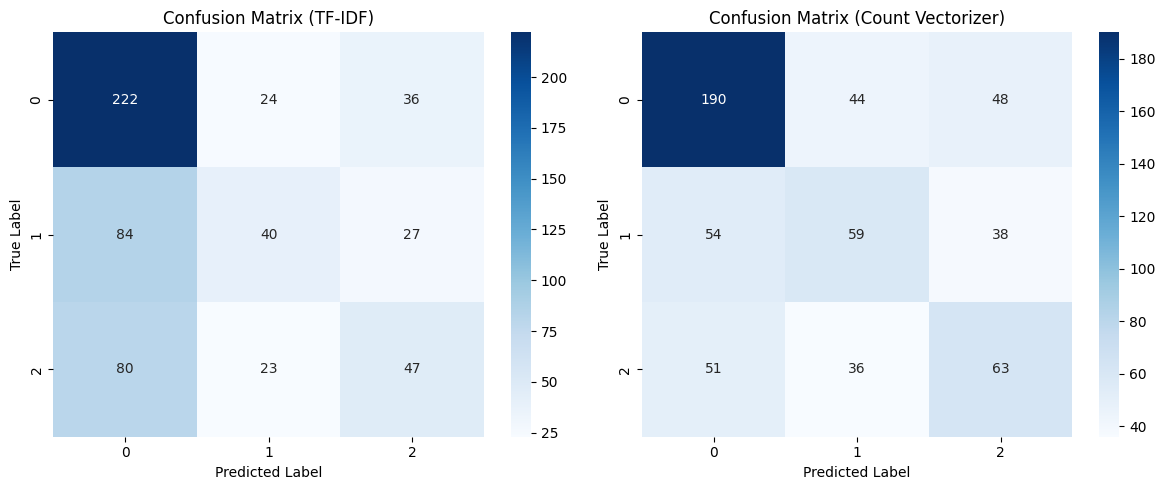

In [ ]:
print("Logistic Regression with TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))
print("------------------------------------------------------")
print("Logistic Regression with Count Vectorizer:")
print(classification_report(y_test, y_pred_count))


cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix for Logistic Regression with TF-IDF:\n", cm_tfidf)

cm_count = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix for Logistic Regression with Count Vectorizer:\n", cm_count)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (TF-IDF)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Count Vectorizer)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)
accuracy_rf_tfidf = accuracy_score(y_test, y_pred_rf_tfidf)
print(f"Random Forest with TF-IDF Accuracy: {accuracy_rf_tfidf:.4f}")

rf_count = RandomForestClassifier()
rf_count.fit(X_train_count, y_train)
y_pred_rf_count = rf_count.predict(X_test_count)
accuracy_rf_count = accuracy_score(y_test, y_pred_rf_count)
print(f"Random Forest with Count Vectorizer Accuracy: {accuracy_rf_count:.4f}")

Random Forest with TF-IDF Accuracy: 0.5437
Random Forest with Count Vectorizer Accuracy: 0.5403


Random Forest with TF-IDF:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       282
           1       0.55      0.19      0.28       151
           2       0.50      0.35      0.41       150

    accuracy                           0.54       583
   macro avg       0.53      0.46      0.45       583
weighted avg       0.54      0.54      0.50       583

---------------------------------------------------------
Random Forest with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.57      0.81      0.67       282
           1       0.54      0.20      0.29       151
           2       0.44      0.38      0.41       150

    accuracy                           0.54       583
   macro avg       0.52      0.46      0.46       583
weighted avg       0.53      0.54      0.50       583

Confusion Matrix for Random Forest with TF-IDF:
 [[222  24  36]
 [ 84  40  27]
 [ 80  23  47]]
Confusion Matrix for 

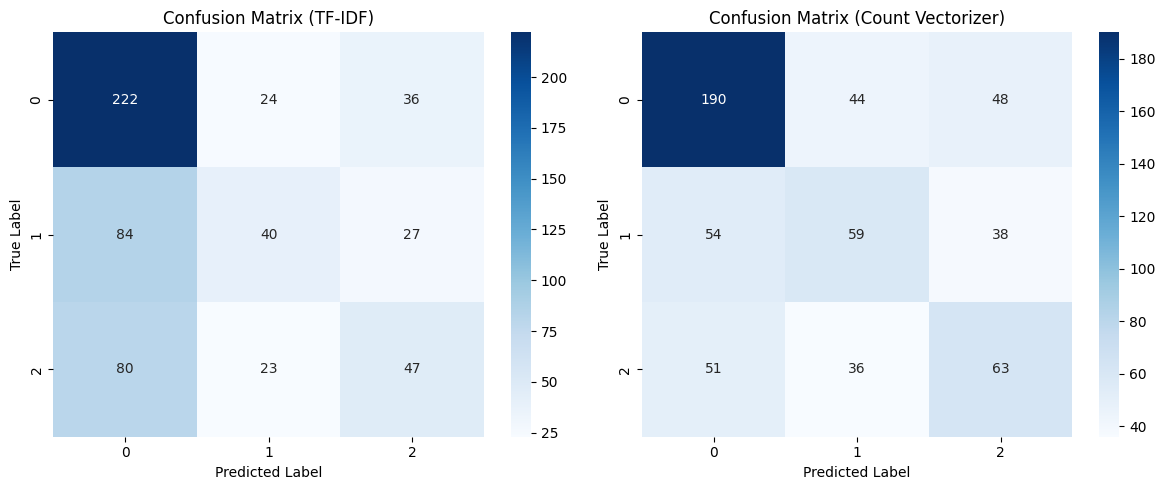

In [ ]:
print("Random Forest with TF-IDF:")
print(classification_report(y_test, y_pred_rf_tfidf))
print("---------------------------------------------------------")
print("Random Forest with Count Vectorizer:")
print(classification_report(y_test, y_pred_rf_count))

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix for Random Forest with TF-IDF:\n", cm_tfidf)

cm_count = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix for Random Forest with Count Vectorizer:\n", cm_count)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (TF-IDF)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Count Vectorizer)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
print(f"Naive Bayes with TF-IDF Accuracy: {accuracy_nb_tfidf:.4f}")

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_nb_count = nb_count.predict(X_test_count)
accuracy_nb_count = accuracy_score(y_test, y_pred_nb_count)
print(f"Naive Bayes with Count Vectorizer Accuracy: {accuracy_nb_count:.4f}")

Naive Bayes with TF-IDF Accuracy: 0.5197
Naive Bayes with Count Vectorizer Accuracy: 0.5163


Naive Bayes with TF-IDF:
              precision    recall  f1-score   support

           0       0.52      0.94      0.67       282
           1       0.51      0.12      0.19       151
           2       0.59      0.13      0.21       150

    accuracy                           0.52       583
   macro avg       0.54      0.40      0.36       583
weighted avg       0.54      0.52      0.43       583

---------------------------------------------------------
Naive Bayes with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       282
           1       0.42      0.32      0.37       151
           2       0.40      0.31      0.35       150

    accuracy                           0.52       583
   macro avg       0.47      0.45      0.45       583
weighted avg       0.50      0.52      0.50       583

Confusion Matrix for Naive Bayes with TF-IDF:
 [[222  24  36]
 [ 84  40  27]
 [ 80  23  47]]
Confusion Matrix for Naive 

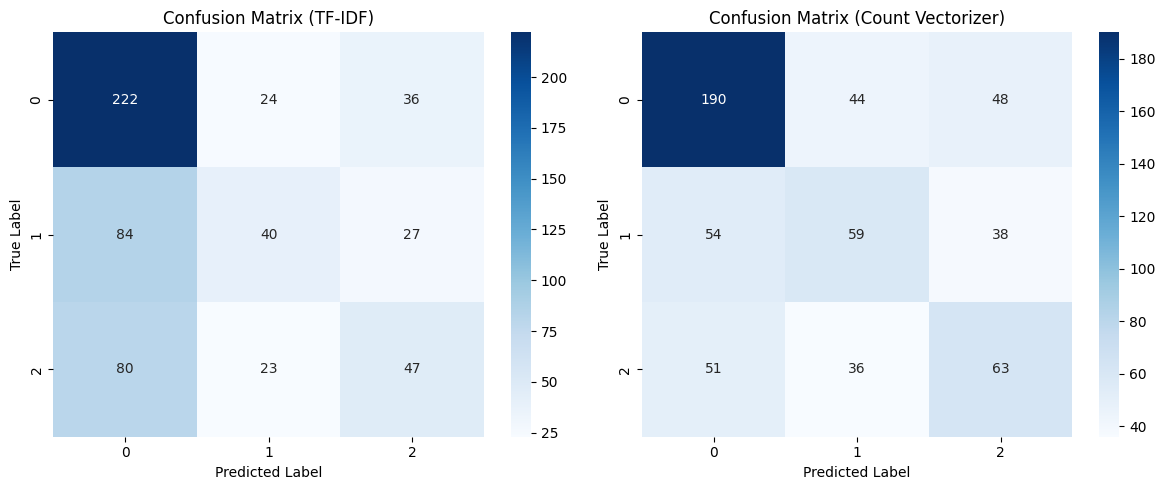

In [ ]:
print("Naive Bayes with TF-IDF:")
print(classification_report(y_test, y_pred_nb_tfidf))
print("---------------------------------------------------------")
print("Naive Bayes with Count Vectorizer:")
print(classification_report(y_test, y_pred_nb_count))

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix for Naive Bayes with TF-IDF:\n", cm_tfidf)

cm_count = confusion_matrix(y_test, y_pred_count)
print("Confusion Matrix for Naive Bayes with Count Vectorizer:\n", cm_count)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (TF-IDF)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Count Vectorizer)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)
accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
print(f"SVM with TF-IDF Accuracy: {accuracy_svm_tfidf:.4f}")

svm_count = SVC()
svm_count.fit(X_train_count, y_train)
y_pred_svm_count = svm_count.predict(X_test_count)
accuracy_svm_count = accuracy_score(y_test, y_pred_svm_count)
print(f"SVM with Count Vectorizer Accuracy: {accuracy_svm_count:.4f}")

SVM with TF-IDF Accuracy: 0.5386
SVM with Count Vectorizer Accuracy: 0.5437


SVM with TF-IDF:
              precision    recall  f1-score   support

           0       0.54      0.90      0.67       282
           1       0.62      0.17      0.26       151
           2       0.51      0.23      0.31       150

    accuracy                           0.54       583
   macro avg       0.56      0.43      0.42       583
weighted avg       0.55      0.54      0.47       583

---------------------------------------------------------
SVM with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.54      0.88      0.67       282
           1       0.56      0.10      0.17       151
           2       0.54      0.37      0.44       150

    accuracy                           0.54       583
   macro avg       0.55      0.45      0.43       583
weighted avg       0.55      0.54      0.48       583

Confusion Matrix for SVM with TF-IDF:
 [[255   9  18]
 [111  25  15]
 [110   6  34]]
Confusion Matrix for SVM with Count Vectorizer:
 [[

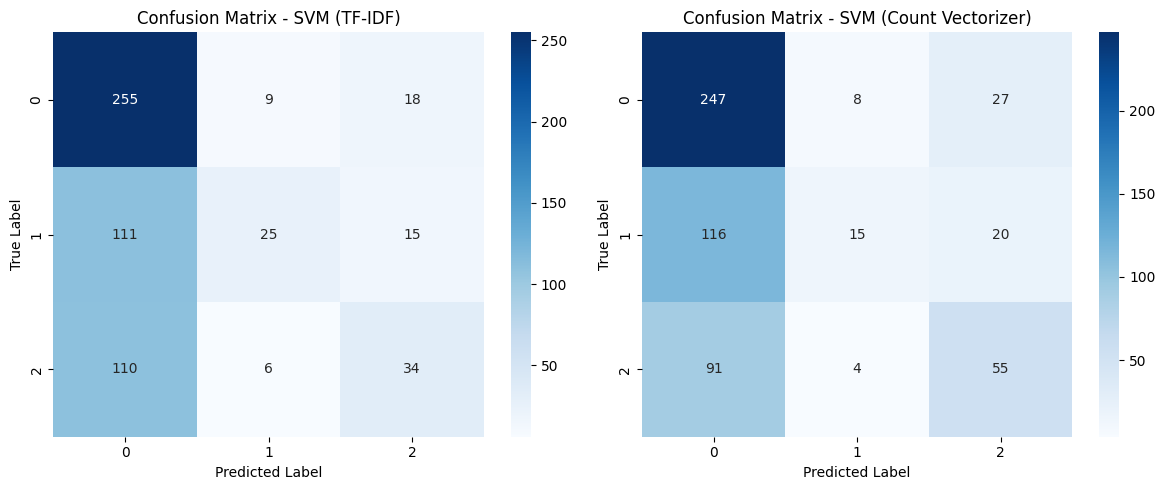

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("SVM with TF-IDF:")
print(classification_report(y_test, y_pred_svm_tfidf))
print("---------------------------------------------------------")
print("SVM with Count Vectorizer:")
print(classification_report(y_test, y_pred_svm_count))

cm_svm_tfidf = confusion_matrix(y_test, y_pred_svm_tfidf)
print("Confusion Matrix for SVM with TF-IDF:\n", cm_svm_tfidf)

cm_svm_count = confusion_matrix(y_test, y_pred_svm_count)
print("Confusion Matrix for SVM with Count Vectorizer:\n", cm_svm_count)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - SVM (TF-IDF)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_svm_count, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - SVM (Count Vectorizer)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_tfidf = GradientBoostingClassifier()
gb_tfidf.fit(X_train_tfidf, y_train)
y_pred_gb_tfidf = gb_tfidf.predict(X_test_tfidf)
accuracy_gb_tfidf = accuracy_score(y_test, y_pred_gb_tfidf)
print(f"Gradient boosting with TF-IDF Accuracy: {accuracy_gb_tfidf:.4f}")

gb_count = GradientBoostingClassifier()
gb_count.fit(X_train_count, y_train)
y_pred_gb_count = gb_count.predict(X_test_count)
accuracy_gb_count = accuracy_score(y_test, y_pred_gb_count)
print(f"Gradient boosting with Count Vectorizer Accuracy: {accuracy_gb_count:.4f}")

Gradient boosting with TF-IDF Accuracy: 0.5232
Gradient boosting with Count Vectorizer Accuracy: 0.5300


Gradient Boosting with TF-IDF:
              precision    recall  f1-score   support

           0       0.53      0.89      0.66       282
           1       0.52      0.18      0.27       151
           2       0.50      0.19      0.27       150

    accuracy                           0.52       583
   macro avg       0.52      0.42      0.40       583
weighted avg       0.52      0.52      0.46       583

---------------------------------------------------------
Gradient Boosting with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       282
           1       0.63      0.18      0.28       151
           2       0.45      0.16      0.24       150

    accuracy                           0.53       583
   macro avg       0.54      0.42      0.40       583
weighted avg       0.54      0.53      0.46       583

Confusion Matrix for Gradient Boosting with TF-IDF:
 [[250  14  18]
 [114  27  10]
 [111  11  28]]
Confusion

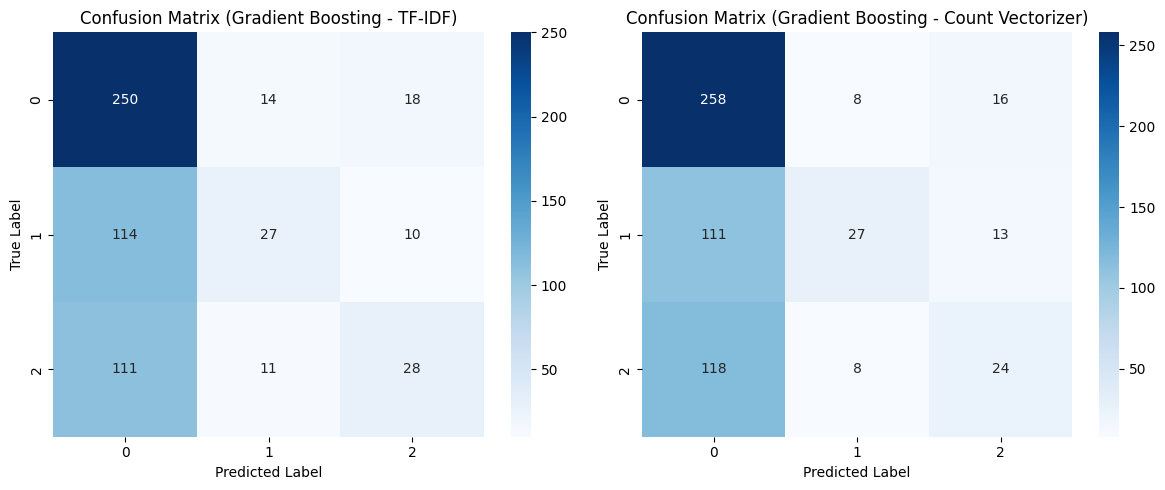

In [ ]:
print("Gradient Boosting with TF-IDF:")
print(classification_report(y_test, y_pred_gb_tfidf))
print("---------------------------------------------------------")
print("Gradient Boosting with Count Vectorizer:")
print(classification_report(y_test, y_pred_gb_count))

cm_gb_tfidf = confusion_matrix(y_test, y_pred_gb_tfidf)
print("Confusion Matrix for Gradient Boosting with TF-IDF:\n", cm_gb_tfidf)

cm_gb_count = confusion_matrix(y_test, y_pred_gb_count)
print("Confusion Matrix for Gradient Boosting with Count Vectorizer:\n", cm_gb_count)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_gb_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Gradient Boosting - TF-IDF)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(cm_gb_count, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Gradient Boosting - Count Vectorizer)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

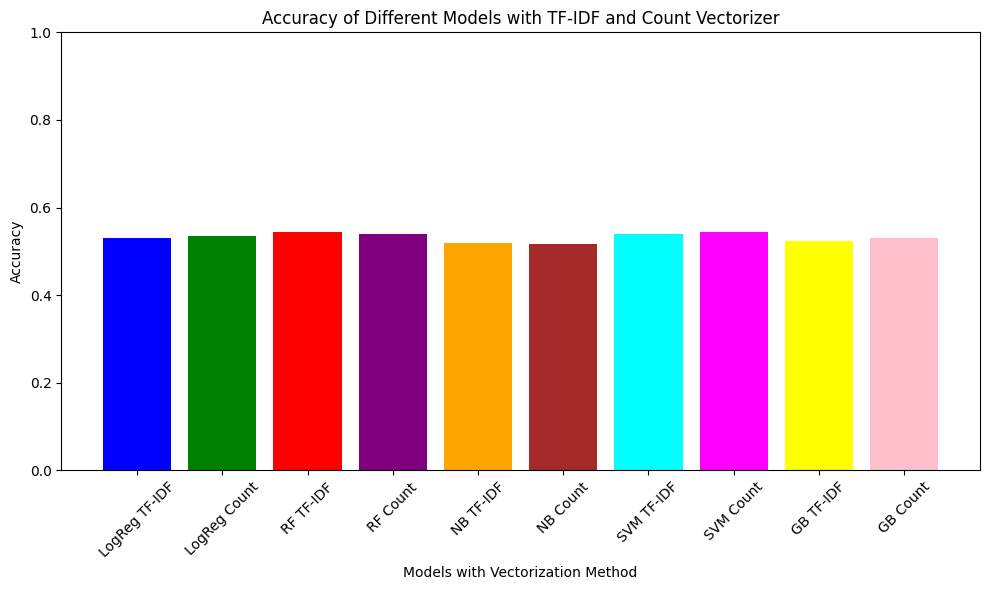

In [ ]:
models = ['LogReg TF-IDF', 'LogReg Count', 'RF TF-IDF', 'RF Count', 'NB TF-IDF', 'NB Count', 'SVM TF-IDF', 'SVM Count', 'GB TF-IDF', 'GB Count']
accuracies = [accuracy_logreg_tfidf, accuracy_logreg_count, accuracy_rf_tfidf, accuracy_rf_count, accuracy_nb_tfidf, accuracy_nb_count, accuracy_svm_tfidf, accuracy_svm_count, accuracy_gb_tfidf, accuracy_gb_count]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan', 'magenta', 'yellow', 'pink'])
plt.xlabel('Models with Vectorization Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models with TF-IDF and Count Vectorizer')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
from tabulate import tabulate

models = ['LogReg TF-IDF', 'LogReg Count', 'RF TF-IDF', 'RF Count', 'NB TF-IDF', 'NB Count', 'SVM TF-IDF', 'SVM Count', 'GB TF-IDF', 'GB Count']
accuracies = [accuracy_logreg_tfidf, accuracy_logreg_count, accuracy_rf_tfidf, accuracy_rf_count, accuracy_nb_tfidf, accuracy_nb_count,accuracy_svm_tfidf,accuracy_svm_count,accuracy_gb_tfidf,accuracy_gb_count]

table_data = list(zip(models, accuracies))

print(tabulate(table_data, headers=['Model', 'Accuracy'], tablefmt='grid'))


+---------------+------------+
| Model         |   Accuracy |
+===============+============+
| LogReg TF-IDF |   0.530017 |
+---------------+------------+
| LogReg Count  |   0.535163 |
+---------------+------------+
| RF TF-IDF     |   0.543739 |
+---------------+------------+
| RF Count      |   0.540309 |
+---------------+------------+
| NB TF-IDF     |   0.519726 |
+---------------+------------+
| NB Count      |   0.516295 |
+---------------+------------+
| SVM TF-IDF    |   0.538593 |
+---------------+------------+
| SVM Count     |   0.543739 |
+---------------+------------+
| GB TF-IDF     |   0.523156 |
+---------------+------------+
| GB Count      |   0.530017 |
+---------------+------------+
